## __How to control Contrast and Brightness of an image?__
- ref : https://docs.opencv.org/3.4/d3/dc1/tutorial_basic_linear_transform.html
- __Formula 1__<br>
    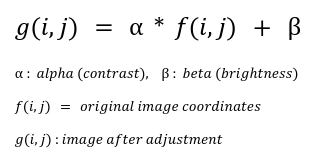
  * `alpha < 1.0` is less contrast, `1.0 < alpha < 3.0` is more contast <br>
  * `beta < 0` is lower brightness, `0 < beta` is higher brightness <br>
  <br>  
- __Formula 2 : gamma correction__ <br>
  : original value에 따라서 다르게 `밝기`조정이 되는 non-linear transformation이다.<br>
  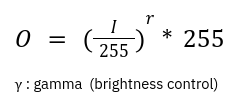
  * `gamma < 1` make the dark regions brighter, `gamma > 1` is opposite (the bright regions will be darker.)
  

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display(img, color='rgb', original=False):
    
    if original==False:

        dpi = 100
        height, width = img.shape[:2]

        figsize = width / float(dpi), height / float(dpi)
        fig = plt.figure(figsize = figsize)
        
        ax = fig.add_axes([0,0,1,1])    
        ax.axis('off')
        
        if color == 'rgb':
            ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))    
        else:
            ax.imshow(img, cmap='gray')
            
        plt.show()
        
    else:
        plt.axis('off')
        if color == 'rgb':
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))    
        else:
            plt.imshow(img, cmap='gray')
        plt.show()

(403, 302, 3)


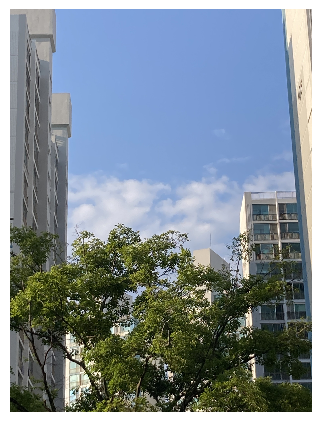

In [24]:
imagepath = './data/IMG_2421.jpg'
image = cv2.imread(imagepath)
image = cv2.resize(image, (image.shape[:2][1]//10, image.shape[:2][0]//10))
print(image.shape)
display(image)

In [23]:
new_image = np.zeros(image.shape, image.dtype)
# display(new_image)

 Basic Linear Transforms 
-------------------------


* Enter the alpha value [1.0-3.0] :  1
* Enter the beta value [0-100] :  80


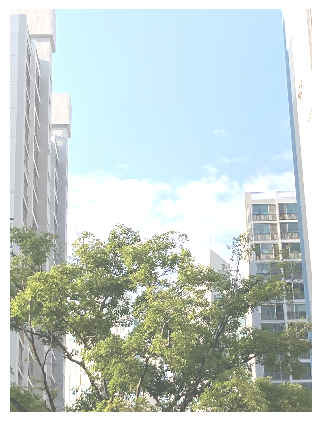

In [46]:
alpha = 1.0   # Simple contrast control
beta = 0      # Simple brightness control

# Initialize values
print(" Basic Linear Transforms ")
print("-------------------------")

alpha = float(input("* Enter the alpha value [1.0-3.0] : "))
beta = int(input("* Enter the beta value [0-100] : "))

for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        for c in range(image.shape[2]):
            new_image[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0, 255)
            
display(new_image)

 Non Linear Transforms 
-----------------------


* Enter the gamma value [0-1 / 1-2?] 0.3


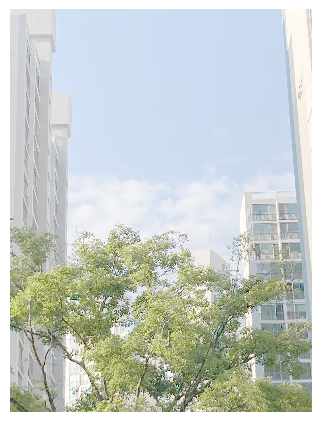

In [43]:
gamma = 1.0

print(" Non Linear Transforms ")
print("-----------------------")

gamma = float(input("* Enter the gamma value [0-1 / 1-2?]"))

lookUpTable = np.empty((1,256), np.uint8)
for i in range(256):
    lookUpTable[0,i] = np.clip(pow(i/255.0, gamma) * 255.0, 0, 255)
    
new_image = cv2.LUT(image, lookUpTable)
            
display(new_image)